In [59]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chardet

In [60]:
path = Path(r"C:\Users\dontb\01\001\Analysis\UFOs\UFOs_data.csv")
ufo = pd.read_csv(path, encoding="Windows-1252")
ufo.columns = ufo.columns.str.strip()
shape_colors = [
    "#364EA1",
    "#386EA2",
    "#3A8EA4",
    "#3CA59D",
    "#3FA680",
    "#41A865",
    "#43A949",
    "#5CAB45",
    "#7BAC47",
    "#99AD4A",
    "#AEA64C",
    "#B08C4E",
    "#B17250",
    "#B25852",
    "#B4556A",
    "#B55787",
    "#B659A3",
    "#B05BB8",
    "#975EB9",
    "#7F60BA",
    "#6862BB",
]

state_colors = [
    "#534618", "#564219", "#593E1A", "#5C3A1B", "#5E351C", "#612F1D",
    "#632A1E", "#66241F", "#692021", "#6B202A", "#6E2133", "#71223C",
    "#732345", "#76244F", "#782559", "#7B2664", "#7E276E", "#80287A",
    "#812983", "#7A2A85", "#732B88", "#6C2C8A", "#642D8D", "#5D2F8F",
    "#553092", "#4C3195", "#443297", "#3B339A", "#34369C", "#35429F",
    "#364EA1", "#395CA3", "#3D69A5", "#4077A6", "#4384A8", "#4790AA",
    "#4A9DAC", "#4DA9AE", "#51AFAA", "#54B1A3", "#57B39B", "#5BB594",
    "#5EB68D", "#61B887", "#65BA80", "#68BB7B", "#6BBD75", "#6FBF70",
    "#79C172", "#84C276", "#8FC479", "#99C67C", "#A4C780", "#ADC983",
    "#B7CB87", "#C0CC8A", "#C8CE8E", "#CFCE91", "#D1CA94", "#D3C698"
]
dates = ufo["Date / Time"]
lng = ufo["lng"]
lat = ufo["lat"]
shapes = ufo["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
shapes = shapes.sort_values(by="Count", ascending=True)
cities = ufo["City"]
states = ufo["State"].value_counts().rename_axis("State").reset_index(name="Count")
states = states.sort_values(by="Count", ascending=True)
summaries = ufo["Summary"]
ufo.rename(columns={"lat": "LAT", "lng": "LNG"}, inplace=True)

ufo["Date / Time"] = ufo["Date / Time"].str.replace(".", ":", regex=True)
ufo["Date / Time"] = pd.to_datetime(ufo["Date / Time"])

In [61]:

jan_data = ufo[ufo["Date / Time"].dt.month == 1]
feb_data = ufo[ufo["Date / Time"].dt.month == 2]
mar_data = ufo[ufo["Date / Time"].dt.month == 3]
apr_data = ufo[ufo["Date / Time"].dt.month == 4]
may_data = ufo[ufo["Date / Time"].dt.month == 5]
jun_data = ufo[ufo["Date / Time"].dt.month == 6]
jul_data = ufo[ufo["Date / Time"].dt.month == 7]
aug_data = ufo[ufo["Date / Time"].dt.month == 8]
sep_data = ufo[ufo["Date / Time"].dt.month == 9]
oct_data = ufo[ufo["Date / Time"].dt.month == 10]
nov_data = ufo[ufo["Date / Time"].dt.month == 11]
dec_data = ufo[ufo["Date / Time"].dt.month == 12]

jan_shapes = jan_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
feb_shapes = feb_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
mar_shapes = mar_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
apr_shapes = apr_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
may_shapes = may_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
jun_shapes = jun_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
jul_shapes = jul_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
aug_shapes = aug_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
sep_shapes = sep_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
oct_shapes = oct_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
nov_shapes = nov_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
dec_shapes = dec_data["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")

In [62]:
ufo_by_month = ufo.resample("M", on="Date / Time").count()
ufo_by_month = ufo_by_month.drop(
    ["City", "State", "Summary", "Shape", "LAT", "LNG"], axis=1
)
ufo_by_month.rename(columns={"Country": "Total Sightings"}, inplace=True)
sightings = ufo_by_month["Total Sightings"]
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
rename_dict = dict(zip(ufo_by_month.index, months))
ufo_by_month.rename(index=rename_dict, inplace=True)

Text(0.5, 1.0, 'Total UFO Sightings by State (2016)\n')

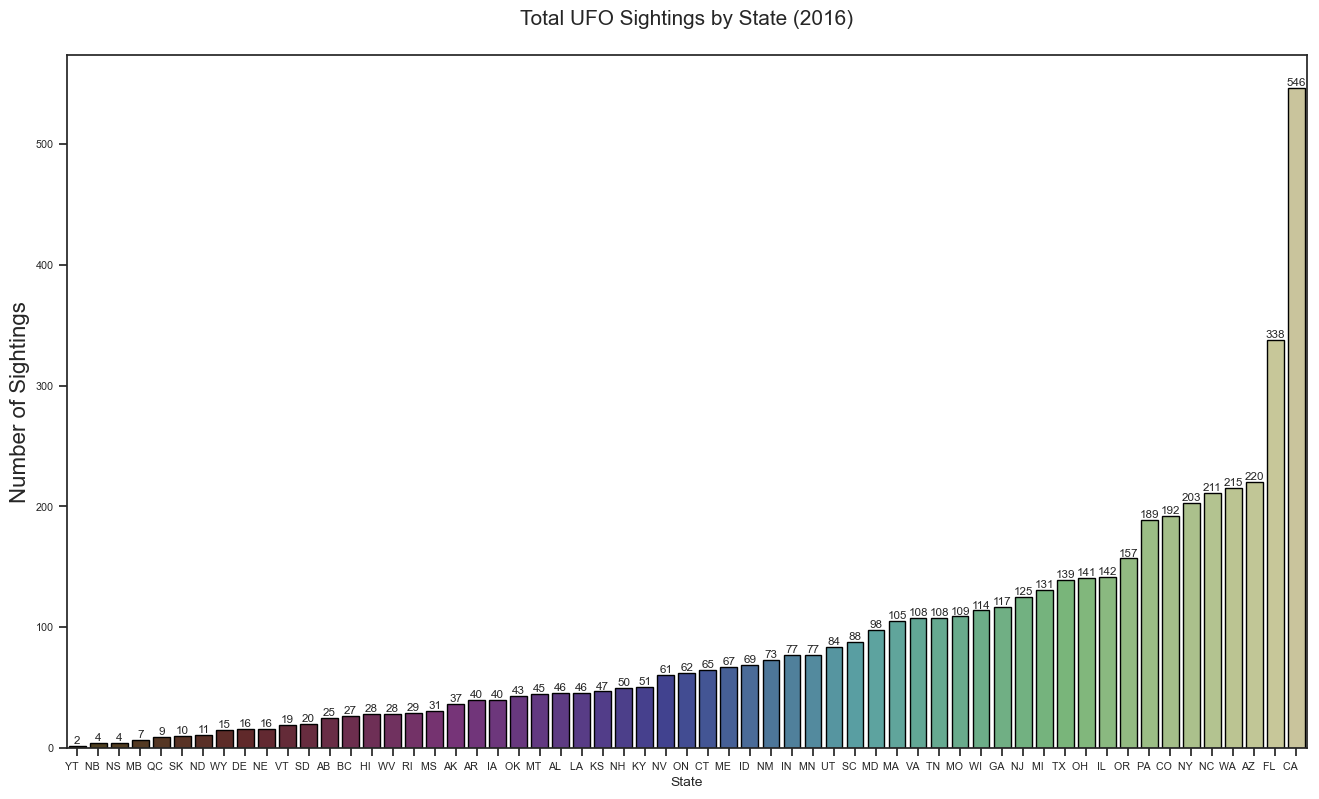

In [63]:
# Bar plot of UFO sightings by state

sns.set_palette(state_colors)
sns.set(font_scale=0.7, style="ticks")
plt.subplots(figsize=(16,9))
chart = sns.barplot(data=states, x="State",y="Count", palette=state_colors, edgecolor="black")
for i in chart.containers:
    chart.bar_label(i)
plt.xlabel('State', fontsize=10);
plt.ylabel('Number of Sightings', fontsize=16);
plt.title('Total UFO Sightings by State (2016)\n', fontsize=15)

Text(0.5, 1.0, 'Total UFO Sightings by Shape (2016)\n')

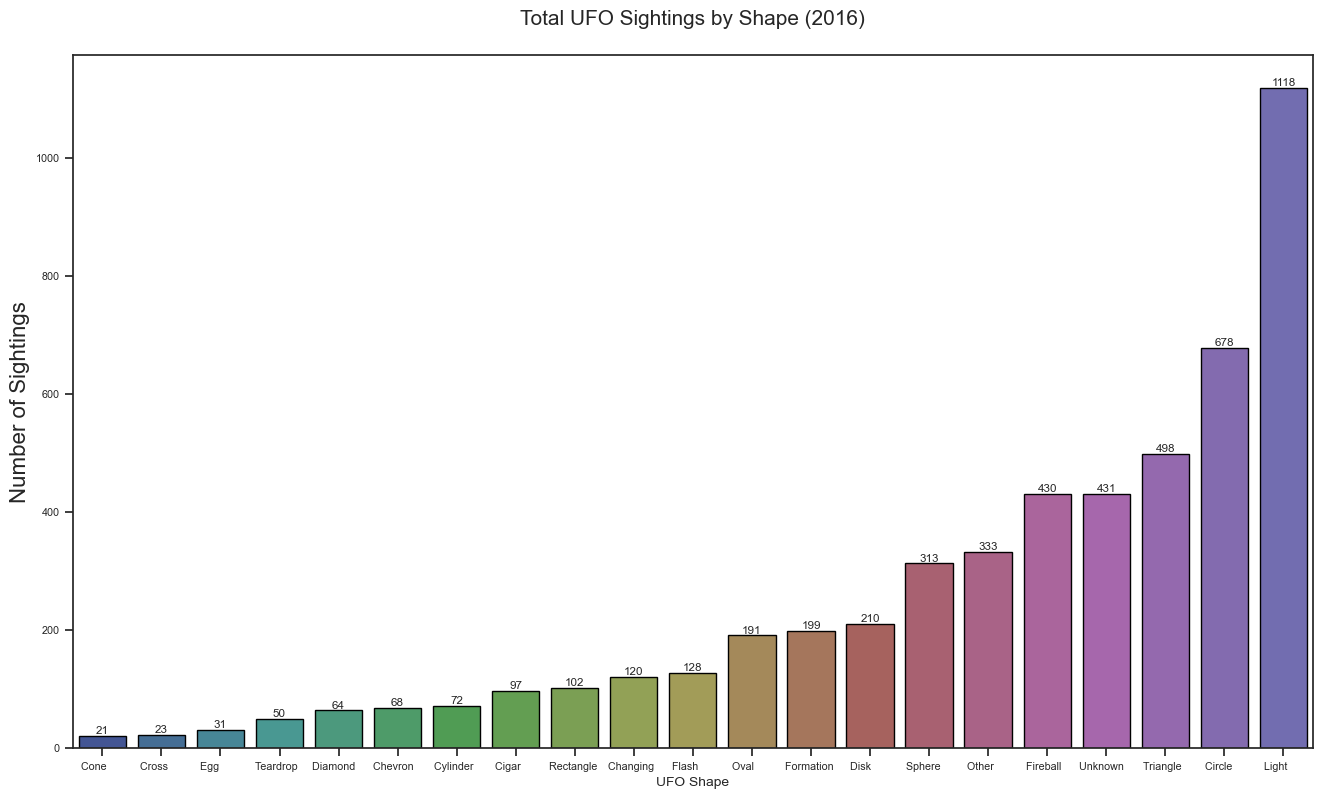

In [64]:
# Bar plot of UFO sightings by shape

sns.set_palette(shape_colors)
sns.set(font_scale=0.7, style="ticks")
plt.subplots(figsize=(16,9))
chart = sns.barplot(data=shapes, x="Shape",y="Count", palette=shape_colors, edgecolor="black")
for i in chart.containers:
    chart.bar_label(i)
plt.xlabel('UFO Shape', fontsize=10);
plt.ylabel('Number of Sightings', fontsize=16);
plt.title('Total UFO Sightings by Shape (2016)\n', fontsize=15)

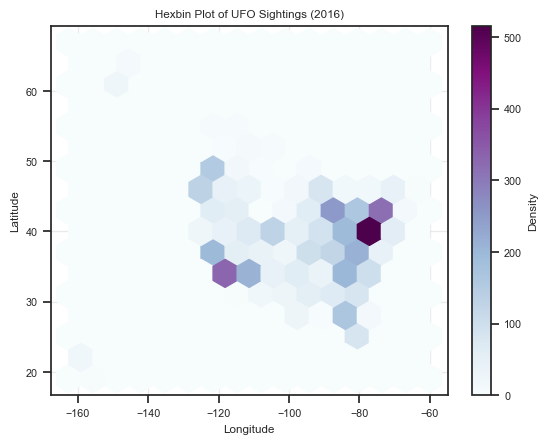

In [65]:
# Hexbin plot of UFO sightings

plt.hexbin(lng, lat, gridsize=15, cmap='BuPu')
plt.colorbar(label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of UFO Sightings (2016)')
plt.grid(True, alpha = 0.4)
plt.show()

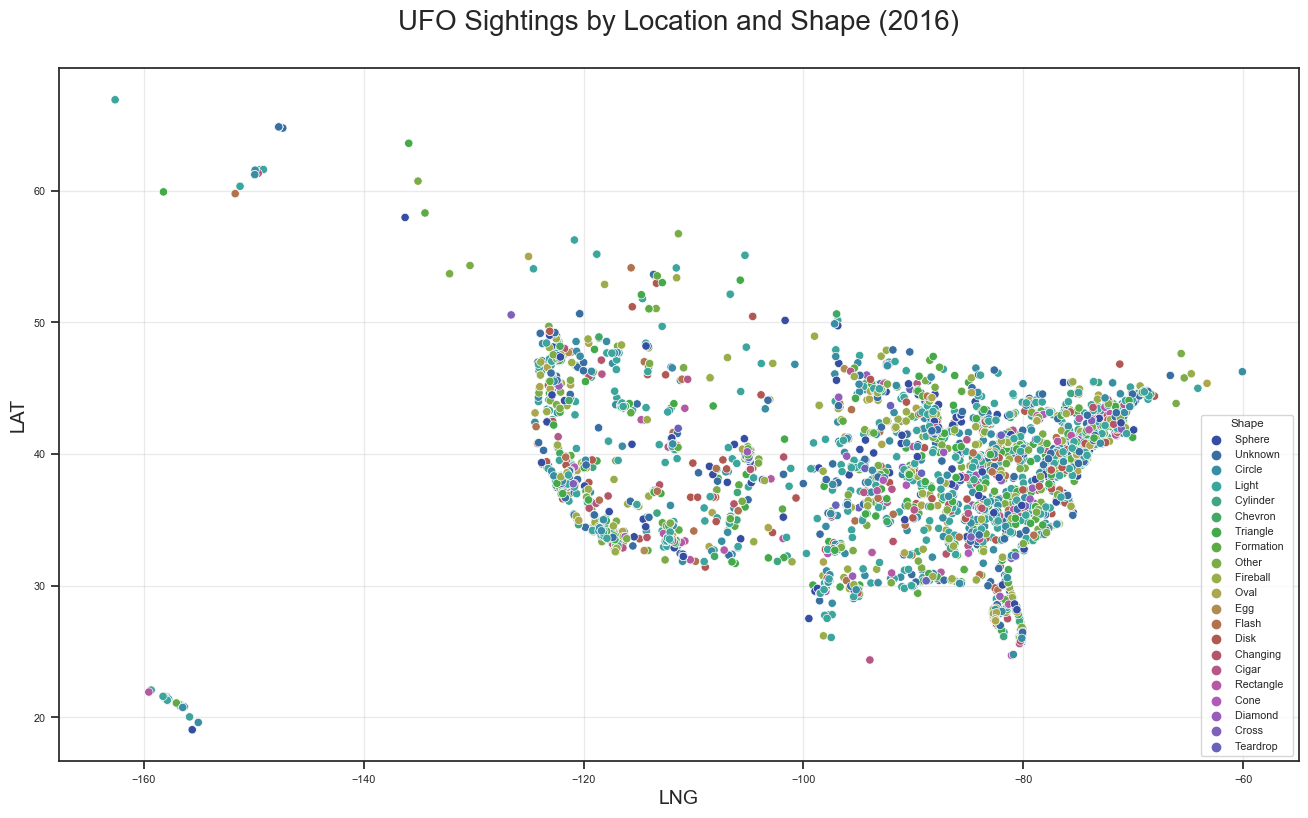

In [66]:
# Scatter slot of UFO sightings by location and shape

sns.set_palette(shape_colors)
plt.figure(figsize=(16, 9))
sns.scatterplot(data=ufo, x="LNG", y="LAT", hue="Shape", palette=shape_colors, legend="auto")
plt.title("UFO Sightings by Location and Shape (2016)\n", fontsize=20)
plt.xlabel("LNG", fontsize = 14)
plt.ylabel("LAT", fontsize = 14)
plt.grid(True, alpha = 0.4)